In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
column_names = ['Sexo', 'Percentil', 'Edad', 'IMC']
raw_dataset = pd.read_csv("IMC_Varones_y_mujeres.csv", names=column_names, sep=',',skiprows=1)

In [3]:
dataset = raw_dataset.copy()
# dataset.tail()

df=raw_dataset.copy()

#filtered_df = df[(df['Sexo'] == 'M') & (df['Percentil'] == 97)]

filtered_df = df[(df['Edad'] < 5.5)]

filtered_df

,Sexo,Percentil,Edad,IMC
0,V,97,5.118310,16.465448
15,V,85,5.118310,15.385226
30,V,75,5.124883,14.956315
45,V,25,5.118310,13.574266
60,V,10,5.105165,13.050041
75,V,3,5.124883,12.541698
90,M,97,5.125235,18.614898
105,M,85,5.125235,16.958847
120,M,75,5.118644,16.321905
136,M,50,5.184558,15.270949


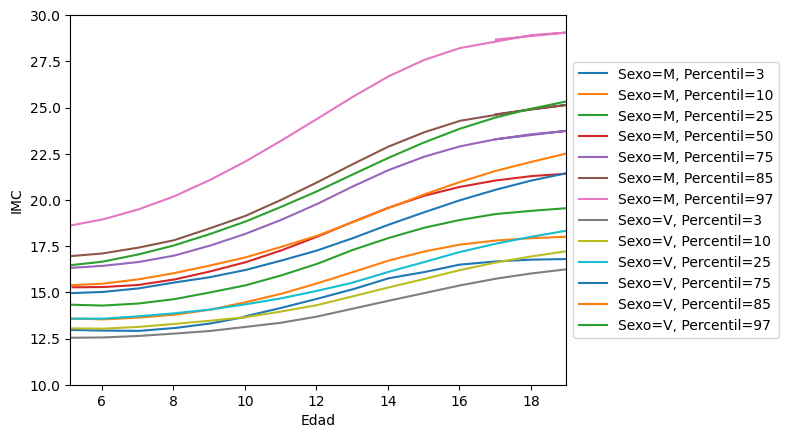

In [4]:
df=raw_dataset.copy()

# Define the x range a partir de valores únicos de edad (para pone en el eje x)
x_range = df['Edad'].unique()

# Group the data by Sexo and Percentil
groups = df.groupby(['Sexo', 'Percentil'])

# Create a figure and axes
fig, ax = plt.subplots()


# Iterate over each group and plot the data
for i, ((sexo, percentil), group) in enumerate(groups):
    # Extract the x and y values
    x = group['Edad']
    y = group['IMC']
    
    # Plot the data on the axes, offset vertically by i
    ax.plot(x, y, label=f"Sexo={sexo}, Percentil={percentil}")

# Set the x-axis limits and labels
ax.set_xlim(x_range[0], x_range[-1])
ax.set_xlabel("Edad")

# Set the y-axis limits and label
ax.set_ylim(10, 30)

# Automatically set the y-axis limits based on the data range
#ax.autoscale(enable=True, axis='y')
ax.set_ylabel("IMC")

# Add a legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Show the plot
plt.show()

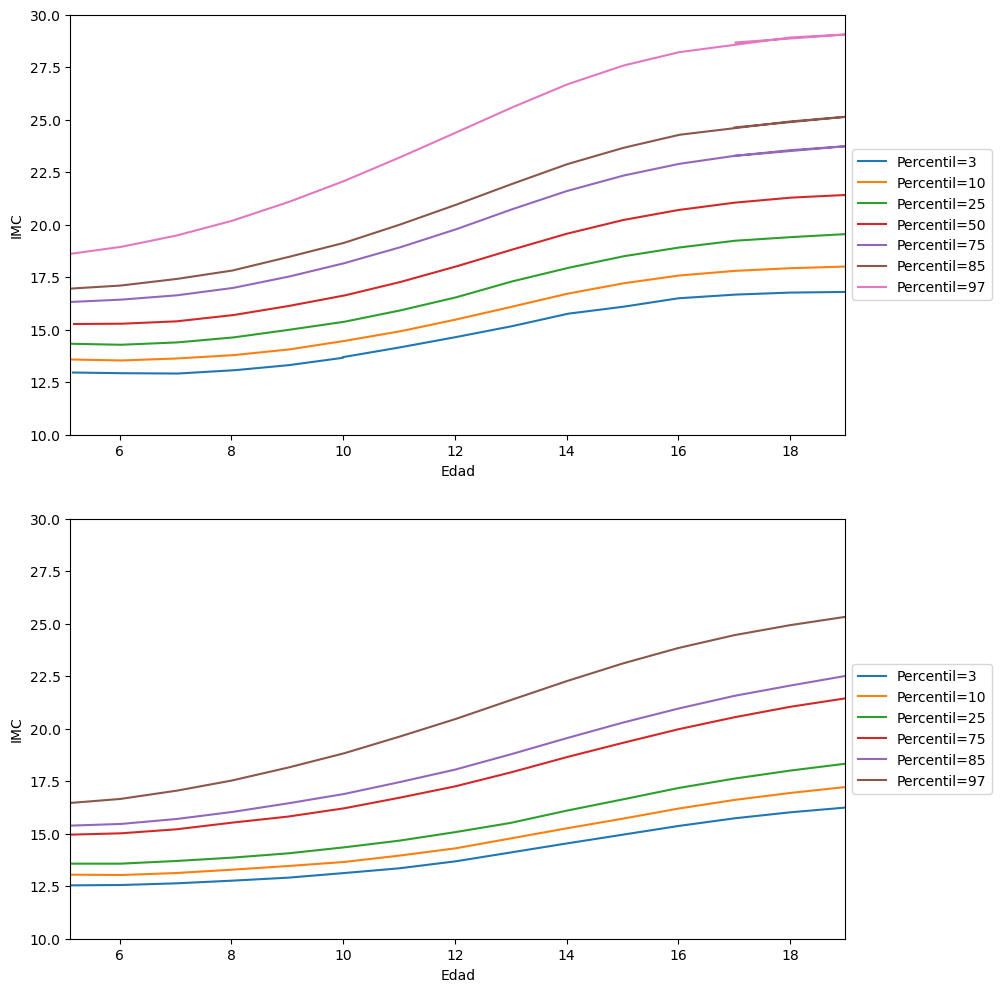

In [5]:

# Define the x range
x_range = df['Edad'].unique()

# Group the data by Sexo and Percentil
groups = df.groupby(['Sexo', 'Percentil'])

# Create two sets of axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Iterate over each group and plot the data on the appropriate axis
for i, ((sexo, percentil), group) in enumerate(groups):
    # Extract the x and y values
    x = group['Edad']
    y = group['IMC']
    
    # Plot the data on the appropriate axis, offset vertically by i
    if sexo == 'M':
        ax1.plot(x, y, label=f"Percentil={percentil}")
    else:
        ax2.plot(x, y, label=f"Percentil={percentil}")

# Set the x-axis limits and labels for both plots
ax1.set_xlim(x_range[0], x_range[-1])
ax2.set_xlim(x_range[0], x_range[-1])
ax1.set_xlabel("Edad")
ax2.set_xlabel("Edad")

# Set the y-axis limits and label for both plots
ax1.set_ylim(10, 30)
ax2.set_ylim(10, 30)
ax1.set_ylabel("IMC")
ax2.set_ylabel("IMC")

# Add a legend to each plot
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Show the plots
plt.show()


In [6]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [7]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

# Extraigo de los datos el resultado que espero obtener
train_labels = train_features.pop('Percentil').astype("float32")
test_labels = test_features.pop('Percentil').astype("float32")

print(type(train_labels))
print(type(test_labels))

test_labels.tail()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


174    10.0
185     3.0
187     3.0
190     3.0
192     3.0
Name: Percentil, dtype: float32

In [8]:
# Normalizo tomando la última columna como referencia (pero normaliza todas)
normalizer = tf.keras.layers.Normalization(axis=-1)

In [9]:
# train_features['Sexo'] = train_features['Sexo'].map({1: 'M', 2: 'V'})

train_features = pd.get_dummies(train_features, columns = ['Sexo'], prefix='', prefix_sep='',dtype=int).astype("float32")

test_features = pd.get_dummies(test_features, columns = ['Sexo'], prefix='', prefix_sep='',dtype=int).astype("float32")

normalizer.adapt(np.array(train_features))

train_features.tail()

,Edad,IMC,M,V
154,8.038607,14.634007,1.0,0.0
128,13.021658,20.732731,1.0,0.0
34,9.009390,15.814137,0.0,1.0
28,18.007511,22.057186,0.0,1.0
114,14.010358,22.882414,1.0,0.0


In [10]:
print(normalizer.mean.numpy())

[[11.841 17.906  0.551  0.449]]


In [11]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print("------------")
  # print('Normalized:', normalizer(first).numpy().astype("float32"))
  print('Normalized:', normalizer(first).numpy())

First example: [[10.02 19.14  1.    0.  ]]
------------
Normalized: [[-0.42  0.34  0.9  -0.9 ]]


In [12]:
# con 32 anda bárbaro 
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(units=1)
])

In [13]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 131ms/step


array([[ 0.068],
       [-0.375],
       [-0.091],
       [-0.092],
       [-0.264],
       [ 0.074],
       [-0.336],
       [-0.008],
       [ 0.026],
       [ 0.036]], dtype=float32)

In [14]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(4, 32) dtype=float32, numpy=
array([[ 0.22 ,  0.369, -0.272, -0.301,  0.225,  0.28 ,  0.152, -0.408,
        -0.358, -0.007,  0.082,  0.272, -0.02 ,  0.027, -0.384, -0.308,
        -0.139,  0.124,  0.14 ,  0.272,  0.316,  0.188,  0.169, -0.136,
        -0.05 ,  0.094,  0.376, -0.215,  0.168, -0.289,  0.24 ,  0.019],
       [ 0.275,  0.198,  0.362, -0.022,  0.378, -0.328,  0.298,  0.209,
        -0.165, -0.298, -0.165, -0.032,  0.281,  0.149,  0.18 , -0.169,
        -0.166, -0.386,  0.26 ,  0.182,  0.048, -0.133,  0.371, -0.163,
         0.357, -0.302, -0.072,  0.303,  0.405, -0.066,  0.397,  0.019],
       [-0.403, -0.104,  0.   , -0.377,  0.07 , -0.297,  0.071, -0.279,
         0.265,  0.388, -0.041,  0.279, -0.022,  0.285, -0.075,  0.139,
         0.312, -0.229, -0.178,  0.193, -0.253, -0.119, -0.248, -0.316,
        -0.257,  0.238, -0.286,  0.408,  0.079,  0.386, -0.192,  0.142],
       [ 0.034, -0.017,  0.194,  0.225,  0.329, -0.274,  0.136,  0.

In [15]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')
train_labels.tail()

154    25.0
128    75.0
34     75.0
28     85.0
114    85.0
Name: Percentil, dtype: float32

In [16]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=450,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

train_features

CPU times: total: 4.64 s
Wall time: 12.2 s


,Edad,IMC,M,V
110,10.022599,19.140375,1.0,0.0
12,17.001877,24.455917,0.0,1.0
178,17.016008,17.802795,1.0,0.0
74,19.006573,17.227959,0.0,1.0
149,18.017891,21.290058,1.0,0.0
...,...,...,...,...
154,8.038607,14.634007,1.0,0.0
128,13.021658,20.732731,1.0,0.0
34,9.009390,15.814137,0.0,1.0
28,18.007511,22.057186,0.0,1.0


In [17]:
train_labels

110    85.0
12     97.0
178    10.0
74     10.0
149    50.0
       ... 
154    25.0
128    75.0
34     75.0
28     85.0
114    85.0
Name: Percentil, Length: 158, dtype: float32

In [18]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 70])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Percentil]')
  plt.legend()
  plt.grid(True)

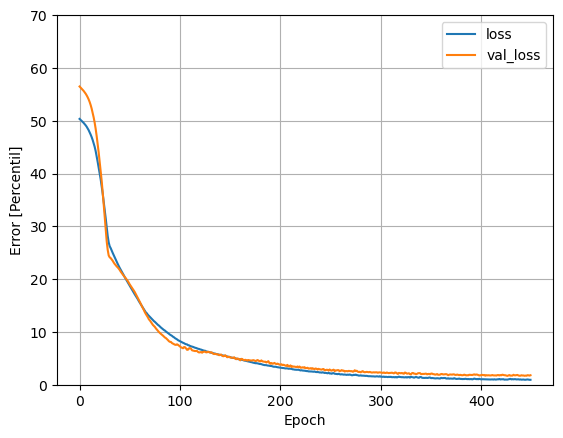

In [19]:
plot_loss(history)

In [20]:
#test_results = {}

test_results = linear_model.evaluate(
    test_features, test_labels, verbose=1)

test_results

2/2 [==============================] - 0s 16ms/step - loss: 1.5969


1.5969362258911133

In [21]:
linear_model.predict(test_features)

2/2 [==============================] - 0s 2ms/step


array([[97.683],
       [84.836],
       [83.906],
       [82.069],
       [71.762],
       [71.988],
       [72.966],
       [75.885],
       [24.153],
       [25.764],
       [10.007],
       [10.049],
       [10.36 ],
       [ 2.747],
       [ 3.023],
       [ 4.264],
       [ 3.13 ],
       [ 3.11 ],
       [ 3.14 ],
       [97.731],
       [99.888],
       [81.465],
       [82.076],
       [73.76 ],
       [49.419],
       [49.499],
       [52.151],
       [51.912],
       [40.13 ],
       [25.843],
       [24.672],
       [20.003],
       [10.468],
       [ 9.811],
       [ 9.658],
       [ 3.035],
       [ 3.23 ],
       [ 2.876],
       [ 2.862]], dtype=float32)

In [22]:
test_features

,Edad,IMC,M,V
9,14.017839,22.279587,0.0,1.0
21,11.027230,17.466242,0.0,1.0
25,15.010329,20.293882,0.0,1.0
29,19.000000,22.517872,0.0,1.0
31,6.025352,15.019857,0.0,1.0
32,7.017840,15.210485,0.0,1.0
36,11.020658,16.719618,0.0,1.0
39,14.017839,18.657665,0.0,1.0
47,7.011268,13.701350,0.0,1.0
58,18.000938,18.006353,0.0,1.0


In [23]:
# Save the model
SAVED_MODEL_PATH = '/tmp/clau'
#SAVED_MODEL_PATH = 'D:\tmp\claudio'

tf.saved_model.save(
    linear_model, SAVED_MODEL_PATH,
)


INFO:tensorflow:Assets written to: /tmp/clau\assets


INFO:tensorflow:Assets written to: /tmp/clau\assets


In [24]:
converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL_PATH) # path to the SavedModel directory

tflite_model = converter.convert()

# https://www.tensorflow.org/lite/models/convert/convert_models
# Convert the model.
#converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

# Print the signatures from the converted model
interpreter = tf.lite.Interpreter(model_content=tflite_model)

signatures = interpreter.get_signature_list()
print(signatures)

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

{'serving_default': {'inputs': ['normalization_input'], 'outputs': ['dense_3']}}
